<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_Etivity-2

In [ ]:
#@title Current Date
Today = '2021-10-03' #@param {type:"date"}


In [ ]:
#@markdown ---
#@markdown ### Enter your details here:
Student_ID = "20201281" #@param {type:"string"}
Student_full_name = "Aziz AOUDJIT" #@param {type:"string"}
#@markdown ---

In [ ]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = Final #@param ["Draft", "Final"] {type:"raw"}
Submission = True #@param {type:"boolean"}

In [239]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

# INTRODUCTION

**Piecewise regression**, extract from [Wikipedia](https://en.wikipedia.org/wiki/Segmented_regression):

Segmented regression, also known as piecewise regression or broken-stick regression, is a method in regression analysis in which the independent variable is partitioned into intervals and a separate line segment is fit to each interval. 

* Segmented regression analysis can also be performed on 
multivariate data by partitioning the various independent variables. 
* Segmented regression is useful when the independent variables, clustered into different groups, exhibit different relationships between the variables in these regions. 

* The boundaries between the segments are breakpoints.

* Segmented linear regression is segmented regression whereby the relations in the intervals are obtained by linear regression. 

***The goal is to use advanced Machine Learning methods to predict House price.***

## Imports

In [2]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import arviz as az
from sklearn.preprocessing import StandardScaler

In [4]:
# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [5]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

# DATASET

Extract from this [paper](https://ieeexplore.ieee.org/document/9300074):

* House prices are a significant impression of the economy, and its value ranges are of great concerns for the clients and property dealers. 

* Housing price escalate every year that eventually reinforced the need of strategy or technique that could predict house prices in future. 

* There are certain factors that influence house prices including physical conditions, locations, number of bedrooms and others.


1. [Download the dataset](https://github.com/UL-ET5003/ET5003_SEM1_2021-2/tree/main/Week-3). 

2. Upload the dataset into your folder.



The challenge is to predict the final price of each house.

## Training & Test Data

In [242]:
# split data into training and test
from sklearn.model_selection import train_test_split



### Train dataset

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [249]:
# training dataset: 
training_file = '/content/drive/MyDrive/university/modules/ET5003/week3/'+'house_train.csv'
dftrain=pd.read_csv(training_file)
# test dataset: 
testing_file = '/content/drive/MyDrive/university/modules/ET5003/week3/'+'house_test.csv'
dftest=pd.read_csv(testing_file)
# cost dataset: 
cost_file = '/content/drive/MyDrive/university/modules/ET5003/week3/'+'true_price.csv'
dfcost=pd.read_csv(cost_file)

In [250]:
# show first data frame rows 
dftrain.columns

Index(['ad_id', 'area', 'bathrooms', 'beds', 'ber_classification', 'county',
       'description_block', 'environment', 'facility', 'features', 'latitude',
       'longitude', 'no_of_units', 'price', 'property_category',
       'property_type', 'surface'],
      dtype='object')

In [71]:
# Generate descriptive statistics
dftrain.describe()

,ad_id,bathrooms,beds,latitude,longitude,no_of_units,price,surface
count,2.982000e+03,2931.000000,2931.000000,2982.000000,2982.000000,59.000000,2.892000e+03,2431.000000
mean,1.224065e+07,1.998635,2.979188,53.355991,-6.257175,7.440678,5.323536e+05,318.851787
std,5.793037e+05,1.291875,1.468408,0.086748,0.141906,8.937081,5.678148e+05,4389.423136
min,9.968870e+05,0.000000,0.000000,51.458439,-6.521183,0.000000,1.999500e+04,3.400000
25%,1.226813e+07,1.000000,2.000000,53.298929,-6.314064,2.000000,2.800000e+05,74.100000
50%,1.237758e+07,2.000000,3.000000,53.345497,-6.252254,3.000000,3.800000e+05,100.000000
75%,1.240294e+07,3.000000,4.000000,53.388845,-6.196049,8.000000,5.750000e+05,142.000000
max,1.242836e+07,18.000000,27.000000,53.630588,-1.744995,36.000000,9.995000e+06,182108.539008


### Test dataset

In [246]:
# show first data frame rows 
dftest.columns

Index(['ad_id', 'area', 'bathrooms', 'beds', 'ber_classification', 'county',
       'description_block', 'environment', 'facility', 'features', 'latitude',
       'longitude', 'no_of_units', 'property_category', 'property_type',
       'surface'],
      dtype='object')

In [73]:
# Generate descriptive statistics
dftest.describe()

,ad_id,bathrooms,beds,latitude,longitude,no_of_units,surface
count,5.000000e+02,500.000000,500.000000,500.000000,500.000000,0.0,500.000000
mean,1.231695e+07,1.994000,2.930000,53.356034,-6.247842,NaN,156.007671
std,1.485832e+05,1.106532,1.191612,0.081905,0.088552,NaN,344.497362
min,1.130615e+07,0.000000,0.000000,53.221348,-6.496987,NaN,33.500000
25%,1.228617e+07,1.000000,2.000000,53.297373,-6.296404,NaN,72.375000
50%,1.237964e+07,2.000000,3.000000,53.339547,-6.243572,NaN,98.000000
75%,1.240544e+07,3.000000,4.000000,53.381650,-6.185055,NaN,138.935000
max,1.242809e+07,8.000000,7.000000,53.619775,-6.064874,NaN,5746.536120


In [74]:
# Generate descriptive statistics
dfcost.describe()

,Id,Expected
count,5.000000e+02,5.000000e+02
mean,1.231695e+07,5.810356e+05
std,1.485832e+05,6.009194e+05
min,1.130615e+07,8.500000e+04
25%,1.228617e+07,2.950000e+05
50%,1.237964e+07,4.250000e+05
75%,1.240544e+07,5.950000e+05
max,1.242809e+07,5.750000e+06


## feature selection


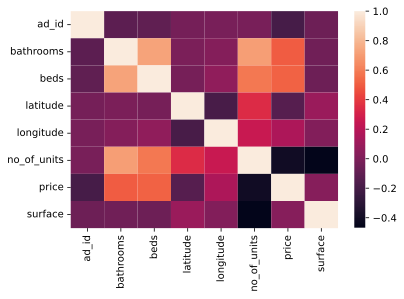

In [251]:
import seaborn as sns
sns.heatmap(dftrain.corr())

ad_id is the id of the property can be discarded, no_of_units vs price has a negative value in term of correlation, so this feature can be discarded, will examine the remaining features bathrooms, beds, latitude, longitude, and price is considered as target feature. will plot all features wil as pairs to check the correlation between all the remaining features, will use pairplot for this purpose, it interresting tool to view the correlation between the features pair by pair. (https://seaborn.pydata.org/generated/seaborn.pairplot.html)


In [252]:
sns.pairplot(data=dftrain[['bathrooms','beds','latitude', 'longitude', 'price']].dropna())
plt.show()

Output hidden; open in https://colab.research.google.com to view.

as the pairplot shows there is correlation between all the features with price.

check the data : check the missing values and remove all rows containing missing data

In [253]:
dftrain.isna().sum()

ad_id                    0
area                     0
bathrooms               51
beds                    51
ber_classification     677
county                   0
description_block        0
environment              0
facility              2017
features                 0
latitude                 0
longitude                0
no_of_units           2923
price                   90
property_category        0
property_type           51
surface                551
dtype: int64

ber_classification, surface, facility and no_of_units has a huge number of missing values, will drop those 2 features
price is target feature so no need to check it
description_block and feature are not significant for our model since it just the description of the property and doesnt impact the price of the property
as stated before ad_idf is just the id of the property as sequential number doesnt have any impact on the price so will remove this column



In [254]:
dftrain = dftrain.drop([ 
                    'ber_classification',
                    'facility',
                    'no_of_units',
                    'surface',
                    'description_block',
                    'features'], axis=1)

remove now the missing value definitively and show again the dftrain data

In [255]:
dftrain = dftrain.dropna()


check if there are feature to encode and check the possible values of each features

In [256]:
nb_features=['area',	'bathrooms'	,'beds',	'county',	'environment',	'latitude',	'longitude',	'property_category',	'property_type']
for i in range(len(nb_features)):
    feature = dftrain[nb_features[i]].unique()
    print(nb_features[i],'->', feature, '\n')

area -> ['Clonee' 'Clondalkin' 'Howth' 'Castleknock' 'Malahide' 'Rathfarnham'
 'Lucan' 'Carrickmines' 'Rathmichael' 'Loughshinny' 'Foxrock' 'Finglas'
 'Balbriggan' 'Dublin 1' 'Ballsbridge' 'Sandycove' 'Dalkey' 'Dublin 8'
 'Skerries' 'Booterstown' 'Ballymun' 'Navan Road (D7)' 'Rush' 'Cabra'
 'Swords' 'Glasnevin' 'Garristown' 'Rialto' 'Drumcondra' 'Donabate'
 'Clontarf' 'Ranelagh' 'Dundrum' 'Donnybrook' 'Dun Laoghaire' 'Santry'
 'Blanchardstown' 'Lusk' 'Sandyford' 'Palmerstown' 'Sandymount' 'Terenure'
 'Dublin 2' 'Killiney' 'Saggart' 'Mulhuddart' 'Portmarnock' 'Cabinteely'
 'Whitehall' 'Walkinstown' 'Christchurch' 'Blackrock' 'Clongriffin'
 'Clonskeagh' 'Shankill' 'Ringsend' 'Churchtown' 'Stepaside' 'Dublin 7'
 'Ballycullen' 'Clonsilla' 'Tyrrelstown' 'Ballybrack' 'Mount Merrion'
 'Rathmines' 'The Ward' 'Kilternan' 'Sutton' "Harold's Cross" 'Glenageary'
 'Clarehall' 'Phibsborough' 'Firhouse' 'Rathgar' 'Portobello' 'Citywest'
 'Baldoyle' 'Killester' 'Monkstown' 'Kilmore' 'Tallaght' 'Ballym

county and environment have only one value, so we will discard it from the model
area is huge picklist datatype, for this model will discard it since it require a complex encoding process and the target of this etivity is piecewise model and not Exploratory data analysis.
property_category  and property_type  will be encoded since it has only few values




we have also some values in the features beds and bathrooms that are not reflecting the type of property , like zero values in both columns and values above 10 , so will remove those values
the plan is :
1. encode trhe two features property_category and property_type
2. remove area, county, environment
3. remove zero values and values upper then 10 for beds and bathrooms features


In [257]:
dftrain = dftrain.drop(['area', 'county','environment'], axis=1)


In [258]:
dftrain = pd.get_dummies(dftrain, columns=['property_category', 'property_type'], drop_first=True)
dftrain.head()

,ad_id,bathrooms,beds,latitude,longitude,price,property_category_sale,property_type_bungalow,property_type_detached,property_type_duplex,property_type_end-of-terrace,property_type_semi-detached,property_type_site,property_type_studio,property_type_terraced,property_type_townhouse
15,9124101,3.0,5.0,53.400454,-6.445730,935000.0,0,0,1,0,0,0,0,0,0,0
26,9135354,4.0,4.0,53.316410,-6.385214,485000.0,0,0,0,0,0,1,0,0,0,0
27,9135646,3.0,5.0,53.401414,-6.446634,935000.0,0,0,1,0,0,0,0,0,0,0
35,9150119,5.0,5.0,53.375377,-6.056749,1475000.0,0,0,1,0,0,0,0,0,0,0
38,9150125,2.0,2.0,53.372130,-6.338466,410000.0,0,0,0,0,0,0,0,0,0,0


show outliers for longitude and latitude

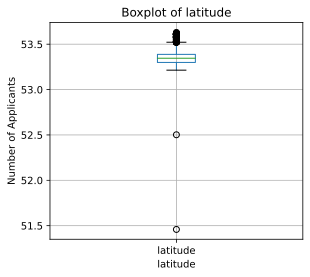

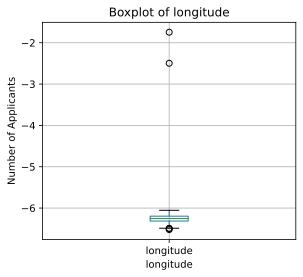

In [259]:
def outliners(feature):
    fig = plt.figure(figsize=(10,4))

    ax = fig.add_subplot(1, 2, 1)
    ax.set_title("Boxplot of " + feature)
    ax.set_xlabel(feature)
    ax.set_ylabel('Number of Applicants')
    dftrain.boxplot(column=[feature])

    plt.show()

outliners('latitude')
outliners('longitude')

we keep only longitude < -6 and latitude > 53 to remove the outliers


In [261]:
dftrain=dftrain[dftrain.bathrooms!=0]
dftrain=dftrain[dftrain.beds!=0]
dftrain=dftrain[dftrain.bathrooms<=10]
dftrain=dftrain[dftrain.beds<=10]
dftrain=dftrain[dftrain.longitude<=-6]
dftrain=dftrain[dftrain.latitude>53]

In [262]:
X = dftrain.loc[:, dftrain.columns != 'price']
y = dftrain['price']
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X, y, test_size=0.35)


Features importance: will use GradientBoostingRegressor from https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html?highlight=feature_importances_#sklearn.ensemble.GradientBoostingRegressor.feature_importances_
to determine the importance of the features we have in the dataset


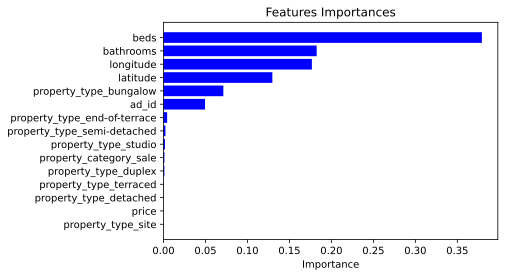

In [263]:

from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=1, max_depth=10)
model.fit(X_train, y_train)

indices = np.argsort(importances)
plt.title('Features Importances')
plt.barh(range(len(indices)), model.feature_importances_[indices], color='b')
plt.yticks(range(len(indices)), [dftrain.columns[i] for i in indices])
plt.xlabel('Importance')
plt.show()

as we can see in the above plot . the main importance features are beds, bathrooms, longitude, latitude respectively, so will use in our model those features to build our predictions model.


## Full Model

In [264]:
# select some features columns just for the baseline model
# assume not all of the features are informative or useful
# in this exercise you could try all of them if possible

featrain = ['latitude','longitude','bathrooms','beds','price']
# dropna: remove missing values
df_subset_train = dftrain[featrain].dropna(axis=0)

# this will be used for performance testing of the model, 
featest = ['latitude','longitude','bathrooms','beds']
df_subset_test  =  dftest[featest].dropna(axis=0)

# cost
df_cost = dfcost[dfcost.index.isin(df_subset_test.index)]

In [265]:
print('Number of nan in df_subset_train dataset: ',df_subset_train.isnull().sum().sum())
print('Number of nan in df_subset_test dataset: ',df_subset_test.isnull().sum().sum())
print('Number of nan in df_cost dataset: ',df_cost.isnull().sum().sum())

Number of nan in df_subset_train dataset:  0
Number of nan in df_subset_test dataset:  0
Number of nan in df_cost dataset:  0


In [268]:
# train set, input columns
Xs_train = df_subset_train.iloc[:,0:-1].values 
#Xs_train = X_train
# train set, output column, cost
ys_train = df_subset_train.iloc[:,-1].values.reshape(-1,1)   
#ys_train = y_train
# test set, input columns
Xs_test = df_subset_test.iloc[:,0:].values 
#Xs_test = X_test
# test set, output column, cost
y_test = df_cost.Expected.values.reshape(-1,1)
#y_test = y_test

In [269]:
print(Xs_train.shape)
print(ys_train.shape)
print(Xs_test.shape)
print(y_test.shape)

(2820, 4)
(2820, 1)
(500, 4)
(500, 1)


In [309]:
# StandardScaler() will normalize the features i.e. each column of X, 
# so, each column/feature/variable will have μ = 0 and σ = 1
sc = StandardScaler()

Xss_train = np.hstack([Xs_train,Xs_train[:,[2]]**2])
xscaler = sc.fit(Xss_train)
Xn_train = xscaler.transform(Xss_train)

Xss_test = np.hstack([Xs_test,Xs_test[:,[2]]**2])
Xn_test = xscaler.transform(Xss_test)

ylog = np.log(ys_train.astype('float').reshape(-1,1))
yscaler = StandardScaler().fit(ylog)
yn_train = yscaler.transform(ylog)

In [310]:
# model
with pm.Model() as model:
    #prior over the parameters of linear regression
    alpha = pm.Normal('alpha', mu=0, sigma=30)
    #we have one beta for each column of Xn
    beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn_train.shape[1])
    #prior over the variance of the noise
    sigma = pm.HalfCauchy('sigma_n', 5)
    #linear regression model in matrix form
    mu = alpha + pm.math.dot(beta, Xn_train.T)
    #likelihood, be sure that observed is a 1d vector
    like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn_train[:,0])
    

Finished [100%]: Average Loss = 2,657.6


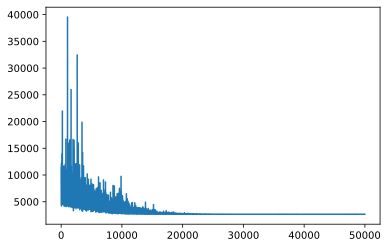

In [339]:
#number of iterations of the algorithms
iter = 50000 

# run the model
with model:
    approximation = pm.fit(iter,method='advi')
    
# check the convergence
plt.plot(approximation.hist);

In [340]:
# samples from the posterior
posterior = approximation.sample(2000)

In [341]:
# prediction
ll=np.mean(posterior['alpha']) + np.dot(np.mean(posterior['beta'],axis=0), Xn_test.T)
y_pred_BLR = np.exp(yscaler.inverse_transform(ll.reshape(-1,1)))[:,0]
print("MAE = ",(np.mean(abs(y_pred_BLR - y_test))))
print("MAPE = ",(np.mean(abs(y_pred_BLR - y_test) / y_test)))

MAE =  209823.89233441642
MAPE =  0.2828303928012691


### Full Model PPC

In [280]:
# Posterior predictive checks (PPCs)
def ppc(alpha,beta,sigma, X,  nsamples=500):
    #we select nsamples random samples from the posterior
    ind = np.random.randint(0,beta.shape[0],size=nsamples)
    alphai = alpha[ind]
    betai = beta[ind,:]
    sigmai = sigma[ind]

    Ypred = np.zeros((nsamples,X.shape[0]))
    for i in range(X.shape[0]):
        #we generate data from linear model
        y_pred = alphai + np.dot(betai, X[i:i+1,:].T).T +np.random.randn(len(sigmai))*sigmai
        Ypred[:,i]=y_pred[0,:]
    return Ypred

In [315]:
num_samples_ = 200
Ypred = yscaler.inverse_transform(ppc(posterior['alpha'],posterior['beta'],posterior['sigma_n'],Xn_train, nsamples=num_samples_))

# plot prediction shape
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})
# label
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")

# true observations
az.plot_dist(ylog,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

Output hidden; open in https://colab.research.google.com to view.

# PIECEWISE REGRESSION

## Clustering

Number of Cluster:

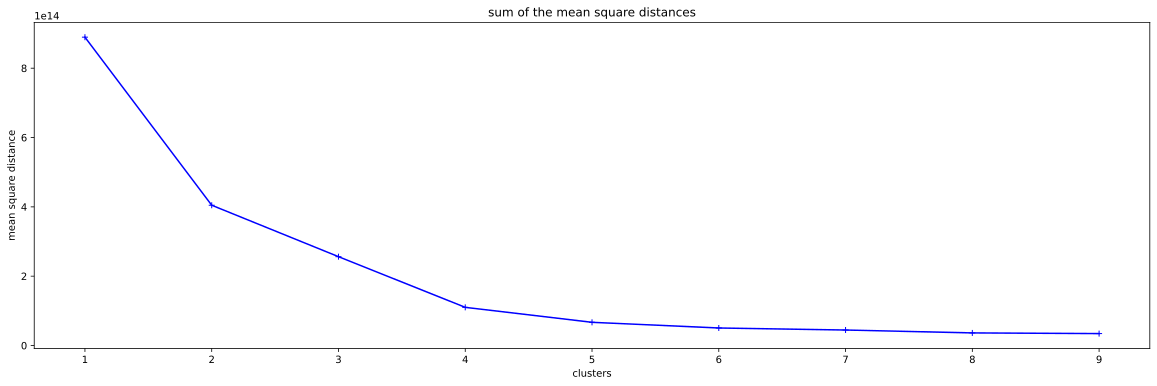

In [282]:
from sklearn.cluster import KMeans

inertia = []
indexes = []
for cls in range(1, 10):
    kmeans = KMeans(init='random', n_clusters=cls, max_iter=500).fit(df_subset_train)
    inertia.append( kmeans.inertia_)
    indexes.append( cls)


plt.figure(figsize=(20, 6))
plt.plot(indexes, inertia, 'b+-')
plt.xlabel("clusters")
plt.ylabel("mean square distance")

plt.title("sum of the mean square distances")
plt.show()

from the k-means algorithm as shown above, we can take elbow point 5 as the number of clusters for this dataset.

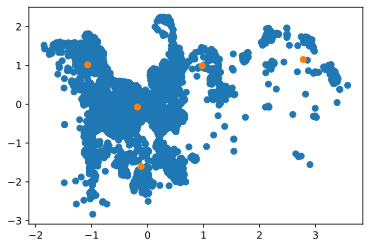

In [283]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
dftrain.head()
gmm = GaussianMixture(n_components=5)
# clustering by features latitude, longitude
ind=[0,1]
X_ind = np.vstack([Xn_train[:,ind],Xn_test[:,ind]])
# Gaussian Mixture
gmm.fit(X_ind)
# plot blue dots
plt.scatter(X_ind[:,0],X_ind[:,1])
# centroids:  orange dots
plt.scatter(gmm.means_[:,0],gmm.means_[:,1])


In [168]:
np.max(ys_train)

9995000.0

### Clusters

In [284]:
# train clusters

# train clusters
clusters_train = gmm.predict(Xn_train[:,ind])
unique_train, counts_train = np.unique(clusters_train, return_counts=True)
dict(zip(unique_train, counts_train))

{0: 278, 1: 481, 2: 401, 3: 180, 4: 1480}

In [285]:
# test clusters
clusters_test = gmm.predict(Xn_test[:,ind])
unique_test, counts_test = np.unique(clusters_test, return_counts=True)
dict(zip(unique_test, counts_test))


{0: 46, 1: 61, 2: 84, 3: 41, 4: 268}

In [286]:
# cluster 0
Xn0 = Xn_train[clusters_train==0,:]
Xtestn0 = Xn_test[clusters_test==0,:]

ylog0 = np.log(ys_train.astype('float')[clusters_train==0,:])
yscaler0 = StandardScaler().fit(ylog0)
yn0 = yscaler0.transform(ylog0)

In [287]:
# cluster 1
Xn1 = Xn_train[clusters_train==1,:]
Xtestn1 = Xn_test[clusters_test==1,:]
ylog1 = np.log(ys_train.astype('float')[clusters_train==1,:])
yscaler1 = StandardScaler().fit(ylog1)
yn1 = yscaler1.transform(ylog1)

In [288]:
# cluster 2
Xn2 = Xn_train[clusters_train==2,:]
Xtestn2 = Xn_test[clusters_test==2,:]
ylog2 = np.log(ys_train.astype('float')[clusters_train==2,:])
yscaler2 = StandardScaler().fit(ylog2)
yn2 = yscaler2.transform(ylog2)

In [289]:
# cluster 3
Xn3 = Xn_train[clusters_train==3,:]
Xtestn3 = Xn_test[clusters_test==3,:]
ylog3 = np.log(ys_train.astype('float')[clusters_train==3,:])
yscaler3 = StandardScaler().fit(ylog3)
yn3 = yscaler3.transform(ylog3)

In [290]:
# cluster 3
Xn4 = Xn_train[clusters_train==4,:]
Xtestn4 = Xn_test[clusters_test==4,:]
ylog4 = np.log(ys_train.astype('float')[clusters_train==4,:])
yscaler4 = StandardScaler().fit(ylog4)
yn4 = yscaler4.transform(ylog4)

## Piecewise Model

In [291]:
# model_0
with pm.Model() as model_0:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn0.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn0.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn0[:,0])



In [335]:
with model_0:
  # iterations of the algorithm
  approximation = pm.fit(60000,method='advi')

# samples from the posterior   
posterior0 = approximation.sample(2500,include_transformed=True)

Finished [100%]: Average Loss = 266.25


In [293]:
# model_1
with pm.Model() as model_1:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn1.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn1.T)
  # likelihood, # 
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn1[:,0])
  
with model_1:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior1 = approximation.sample(5000)

Finished [100%]: Average Loss = 500.34


In [294]:
# model_2
with pm.Model() as model_2:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn2.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  # linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn2.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn2[:,0])
    
with model_2:
  # iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior2 = approximation.sample(5000)

Finished [100%]: Average Loss = 357.09


In [295]:
# model_3
with pm.Model() as model3:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn3.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  mu = alpha + pm.math.dot(beta, Xn3.T)#linear regression model in matrix form
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn3[:,0])
    
with model3:
  # number of iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior     
posterior3 = approximation.sample(5000)

Finished [100%]: Average Loss = 217.54


In [296]:
# model_4
with pm.Model() as model4:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn4.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  mu = alpha + pm.math.dot(beta, Xn4.T)#linear regression model in matrix form
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn4[:,0])
    
with model4:
  # number of iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior     
posterior4 = approximation.sample(5000)

Finished [100%]: Average Loss = 1,398.8


##Simulations

In [ ]:
# Posterior predictive checks (PPCs)
def ppc(alpha,beta,sigma, X,  nsamples=500):
    #we select nsamples random samples from the posterior
    ind = np.random.randint(0,beta.shape[0],size=nsamples)
    alphai = alpha[ind]
    betai = beta[ind,:]
    sigmai = sigma[ind]

    Ypred = np.zeros((nsamples,X.shape[0]))
    for i in range(X.shape[0]):
        #we generate data from linear model
        y_pred = alphai + np.dot(betai, X[i:i+1,:].T).T +np.random.randn(len(sigmai))*sigmai
        Ypred[:,i]=y_pred[0,:]
    return Ypred

### Only Cluster 0

In [297]:
#Simulation
Ypred0 = yscaler0.inverse_transform(ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=180))
for i in range(Ypred0.shape[0]):
    az.plot_dist( Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog0,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

Output hidden; open in https://colab.research.google.com to view.

{0: 180, 1: 1479, 2: 278, 3: 481, 4: 402}

### Only Cluster 1

In [334]:
#Simulation
Ypred1 = yscaler1.inverse_transform(ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=500))
for i in range(Ypred1.shape[0]):
    az.plot_dist( Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog1,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

Output hidden; open in https://colab.research.google.com to view.

### Only Cluster 2

In [318]:
#Simulation
Ypred2 = yscaler2.inverse_transform(ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=300))
for i in range(Ypred2.shape[0]):
    az.plot_dist( Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog2,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

Output hidden; open in https://colab.research.google.com to view.

### Only Cluster 3

In [319]:
#Simulation
Ypred3 = yscaler3.inverse_transform(ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=500))
for i in range(Ypred3.shape[0]):
    az.plot_dist( Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog3,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

Output hidden; open in https://colab.research.google.com to view.

In [320]:
#Simulation
Ypred4 = yscaler4.inverse_transform(ppc(posterior4['alpha'],posterior4['beta'],posterior4['sigma_n'],Xn4,  nsamples=400))
for i in range(Ypred4.shape[0]):
    az.plot_dist( Ypred4[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred4[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog4,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

Output hidden; open in https://colab.research.google.com to view.

## Overall

In [321]:
# posteriors
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200)
Ypred4 = ppc(posterior4['alpha'],posterior4['beta'],posterior4['sigma_n'],Xn4,  nsamples=200)

# simulation
Ypred = np.hstack([ yscaler0.inverse_transform(Ypred0),
                 yscaler1.inverse_transform(Ypred1),
                 yscaler2.inverse_transform(Ypred2),
                 yscaler3.inverse_transform(Ypred3),yscaler4.inverse_transform(Ypred3)])

# prediction
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})

# plot
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
ylog=np.vstack([ylog0,ylog1,ylog2,ylog3,ylog4])
az.plot_dist(ylog,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

Output hidden; open in https://colab.research.google.com to view.

## Test set performance

In [325]:
# cluster 0
y_pred_BLR0 = np.exp(yscaler0.inverse_transform(np.mean(posterior0['alpha']) 
              + np.dot(np.mean(posterior0['beta'],axis=0), Xtestn0.T)))
print("Size Cluster0", np.sum(clusters_test==0), ", MAE Cluster0=",
      (np.mean(abs(y_pred_BLR0 - y_test[clusters_test==0]))))
print("MAPE = ",(np.mean(abs(y_pred_BLR0 - y_test[clusters_test==0]) /y_test[clusters_test==0])))
# cluster 1
y_pred_BLR1 = np.exp(yscaler1.inverse_transform(np.mean(posterior1['alpha']) 
              + np.dot(np.mean(posterior1['beta'],axis=0), Xtestn1.T)))
print("Size Cluster1", np.sum(clusters_test==1), ", MAE Cluster1=",
      (np.mean(abs(y_pred_BLR1 - y_test[clusters_test==1]))))
print("MAPE = ",(np.mean(abs(y_pred_BLR1 - y_test[clusters_test==1]) /y_test[clusters_test==1])))

# cluster 2
y_pred_BLR2 = np.exp(yscaler2.inverse_transform(np.mean(posterior2['alpha']) 
              + np.dot(np.mean(posterior2['beta'],axis=0), Xtestn2.T)))
print("Size Cluster2", np.sum(clusters_test==2), ", MAE Cluster2=",
      (np.mean(abs(y_pred_BLR2 - y_test[clusters_test==2]))))
print("MAPE = ",(np.mean(abs(y_pred_BLR2 - y_test[clusters_test==2]) /y_test[clusters_test==2])))

# cluster 3
y_pred_BLR3 = np.exp(yscaler3.inverse_transform(np.mean(posterior3['alpha']) 
              + np.dot(np.mean(posterior3['beta'],axis=0), Xtestn3.T)))
print("Size Cluster3", np.sum(clusters_test==3), ", MAE Cluster3=",
      (np.mean(abs(y_pred_BLR3 - y_test[clusters_test==3]))))
print("MAPE = ",(np.mean(abs(y_pred_BLR3 - y_test[clusters_test==3]) /y_test[clusters_test==3])))

# cluster 4
y_pred_BLR4 = np.exp(yscaler4.inverse_transform(np.mean(posterior4['alpha']) 
              + np.dot(np.mean(posterior4['beta'],axis=0), Xtestn4.T)))
print("Size Cluster4", np.sum(clusters_test==4), ", MAE Cluster4=",
      (np.mean(abs(y_pred_BLR4 - y_test[clusters_test==4]))))
print("MAPE = ",(np.mean(abs(y_pred_BLR4 - y_test[clusters_test==4]) /y_test[clusters_test==4])))

y_test = df_cost.Expected.values
# joint
joint=np.hstack([abs(y_pred_BLR0 - y_test[clusters_test==0]),
                 abs(y_pred_BLR1 - y_test[clusters_test==1]),
                 abs(y_pred_BLR2 - y_test[clusters_test==2]),
                 abs(y_pred_BLR3 - y_test[clusters_test==3]),
                 abs(y_pred_BLR4 - y_test[clusters_test==4])])
joint_mape = np.mean(np.hstack([
                        abs(y_pred_BLR0 - y_test[clusters_test==0]) /y_test[clusters_test==0],
                        abs(y_pred_BLR1 - y_test[clusters_test==1]) /y_test[clusters_test==1],
                        abs(y_pred_BLR2 - y_test[clusters_test==2]) /y_test[clusters_test==2],
                        abs(y_pred_BLR3 - y_test[clusters_test==3]) /y_test[clusters_test==3],
                        abs(y_pred_BLR4 - y_test[clusters_test==4]) /y_test[clusters_test==4]
                       ]))

# MAE band MAPE
print("MAE=",np.mean(joint),"MAPE=",joint_mape)


Size Cluster0 46 , MAE Cluster0= 156143.57886171478
MAPE =  0.24566923484199069
Size Cluster1 61 , MAE Cluster1= 117232.16544972417
MAPE =  0.22939549908618037
Size Cluster2 84 , MAE Cluster2= 249218.45889439626
MAPE =  0.24478621889577606
Size Cluster3 41 , MAE Cluster3= 83847.23238248483
MAPE =  0.23140370887081765
Size Cluster4 268 , MAE Cluster4= 219241.29096245626
MAPE =  0.2656105176215891
MAE= 194925.03954564297 MAPE= 0.2530542468410463


### PPC on the Test set



In [332]:
num_samples2 = 500
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xtestn0, nsamples=num_samples2)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xtestn1, nsamples=num_samples2)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xtestn2, nsamples=num_samples2)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xtestn3, nsamples=num_samples2)
Ypred4 = ppc(posterior4['alpha'],posterior4['beta'],posterior4['sigma_n'],Xtestn4, nsamples=num_samples2)

# Stack arrays in sequence horizontally (column wise)
Ypred = np.hstack([yscaler0.inverse_transform(Ypred0),
                 yscaler1.inverse_transform(Ypred1),
                 yscaler2.inverse_transform(Ypred2),
                 yscaler3.inverse_transform(Ypred3),
                 yscaler4.inverse_transform(Ypred4)])

# plot prediction shape
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})
# label
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")

# true observations
az.plot_dist(np.log(y_test),label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

Output hidden; open in https://colab.research.google.com to view.

# SUMMARY
targetting house price predictions on provided dataset and testset in this activity, the work organised on 3 main parts, Data analysis, prediction using the full model and prediction using piecewise technic
## 1. Data Analysis
in this part, the target is to select the important features, check the data consistency, check the missing values, the main tasks to achieve this goal are:
### a) check data: 
the first step is to check the features, column names, values etc... this is to understand what data we are dealing with.
### b) check missing values:
removed all missing values from the features
### c) correlation between features:
ploted the correlation between all features and removed all features that are with negative correlation with the target feature Price
### d) outliers check
checked two main important features longitude and latitude and removed all outliers
### e) features selection
used the GradientBoostingRegressor to select the most important features, this lead to the final model to use for predictions, the mains features used for the next step are : longitude, latitude, beds, bathrooms.
## Prediction using the full model
in this step we used all the features previously selected to build our predictions, standard scaler is used to normalise all the features with mean=0 and standard deviation =1,  the prior, likelyhood and the posterior calculated basis on the full traning data, an error of 28.28% is the final MAPE.
## Piecewise Model
to evolve our model for less errors, a piecewise model is used, to claculate the knot values, clustering of the data is used, K-Means is used to calculate the number of clusters and the model is trained with gaussian mixture.
for each cluster, prior, likelyhood and posterior is claculated, the performance shown with this model is much better thank the training of the full model, some clusters shows high performance compared with full model.
the global MAPE that is the mean of the MAPE for each cluster obtained with piecewise Model is 25.30 on the test set, is a higher performce of 3%, that is very interesting for Model optimisation.
more performance can be obtained with making some extra checks on the data, this requires more experiments that i planned to perform in the future.

we can argue as conclusion that the piecewise model perform well then using the full data model.

# Print PDF


In [344]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('ET5003_Etivity2_Aziz_AOUDJIT_20201281.ipynb')

File ‘colab_pdf.py’ already there; not retrieving.





[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/ET5003_Etivity2_Aziz_AOUDJIT_20201281.ipynb to pdf
[NbConvertApp] Support files will be in ET5003_Etivity2_Aziz_AOUDJIT_20201281_files/
[NbConvertApp] Making directory ./ET5003_Etivity2_Aziz_AOUDJIT_20201281_files
[NbConvertApp] Making directory ./ET5003_Etivity2_Aziz_AOUDJIT_20201281_files
[NbConvertApp] Making directory ./ET5003_Etivity2_Aziz_AOUDJIT_20201281_files
[NbConvertApp] Making directory ./ET5003_Etivity2_Aziz_AOUDJIT_20201281_files
[NbConvertApp] Making directory ./ET5003_Etivity2_Aziz_AOUDJIT_20201281_files
[NbConvertApp] Making directory ./ET5003_Etivity2_Aziz_AOUDJIT_20201281_files
[NbConvertApp] Making directory ./ET5003_Etivity2_Aziz_AOUDJIT_20201281_files
[NbConvertApp] Making directory ./ET5003_Etivity2_Aziz_AOUDJIT_20201281_files
[NbConvertApp] Making directory ./ET5003_Etivity2_Aziz_AOUDJIT_20201281_files
[NbConvertApp] Making directory 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'